In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"/content/drive/MyDrive/anemia.csv")

In [5]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [8]:
df.shape

(1421, 6)

In [9]:
df.isnull().sum()

,0
Gender,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
Result,0


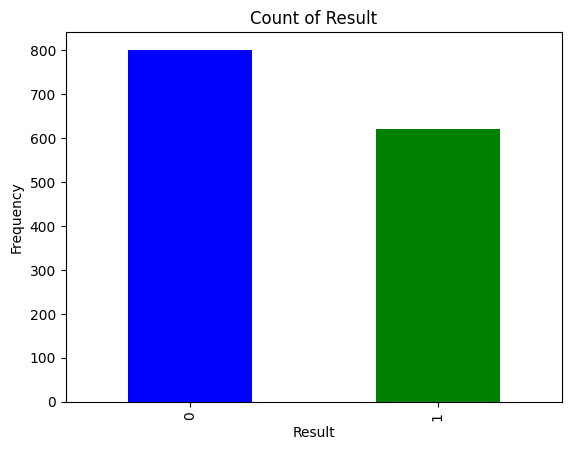

In [11]:
results=df['Result'].value_counts()
results.plot(kind='bar',color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [12]:
from sklearn.utils import resample
majorclass=df[df['Result']==0]
minorclass=df[df['Result']==1]
major_downsample=resample(majorclass,replace=False,n_samples=len(minorclass),random_state=42)
df=pd.concat([major_downsample,minorclass])
print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


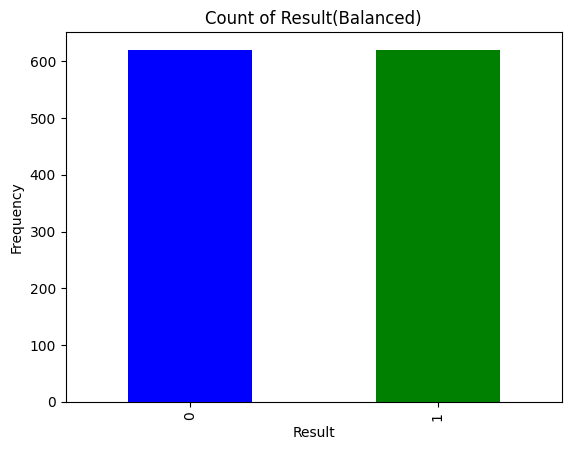

In [14]:
result_balanced=df['Result'].value_counts()
result_balanced.plot(kind='bar',color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result(Balanced)')
plt.show()

In [15]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.540323,13.218145,22.903952,30.277984,85.620968,0.500000
std,0.498573,1.976190,3.993624,1.394515,9.673794,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.400000,85.300000,0.500000
75%,1.000000,14.900000,26.200000,31.500000,94.225000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


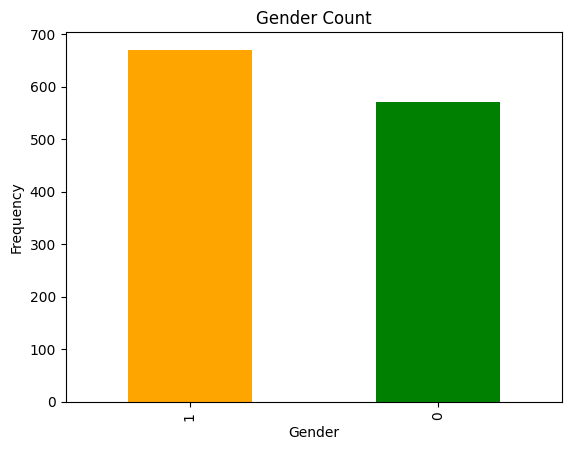

In [16]:
ouput=df['Gender'].value_counts()
ouput.plot(kind='bar',color=['orange','green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Count')
plt.show()

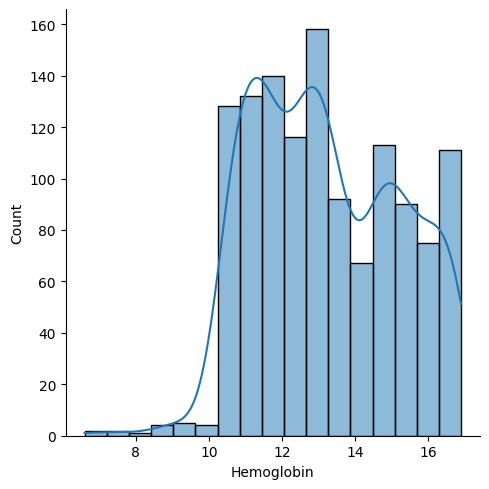

In [17]:
sns.displot(df['Hemoglobin'], kde=True)

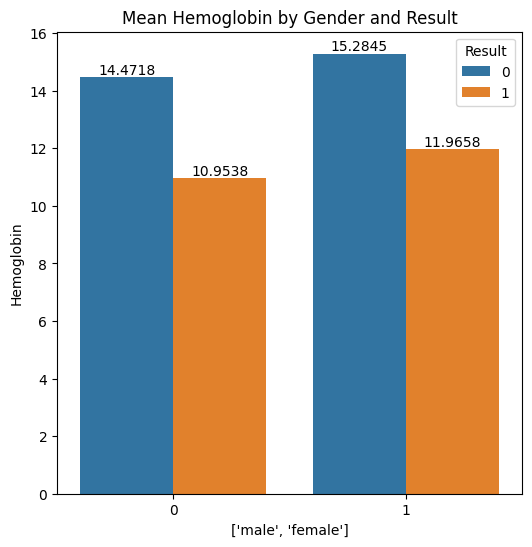

In [23]:
plt.figure(figsize=(6,6))
ax=sns.barplot(y=df['Hemoglobin'],x=df['Gender'],hue=df['Result'],errorbar=None)
ax.set(xlabel=['male','female'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Mean Hemoglobin by Gender and Result')
plt.show()

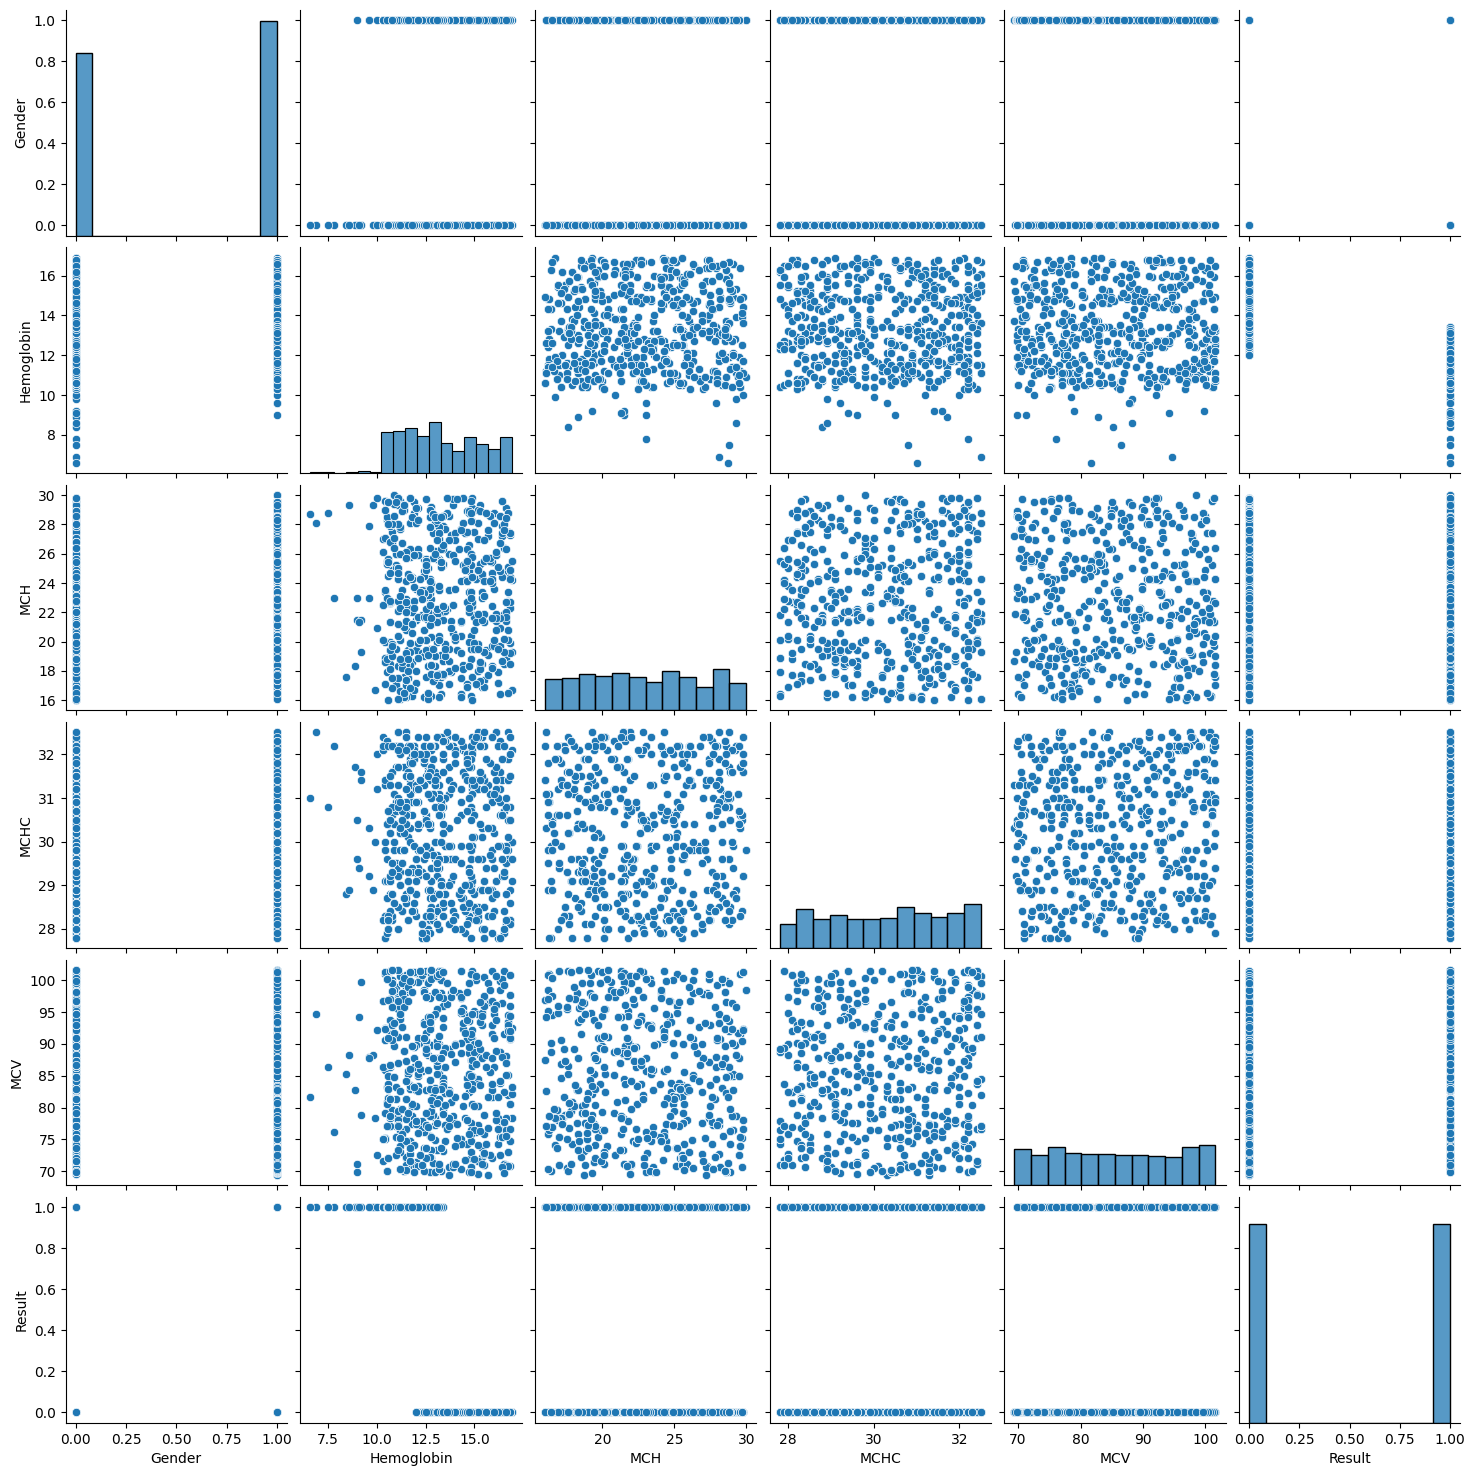

In [24]:
sns.pairplot(df)

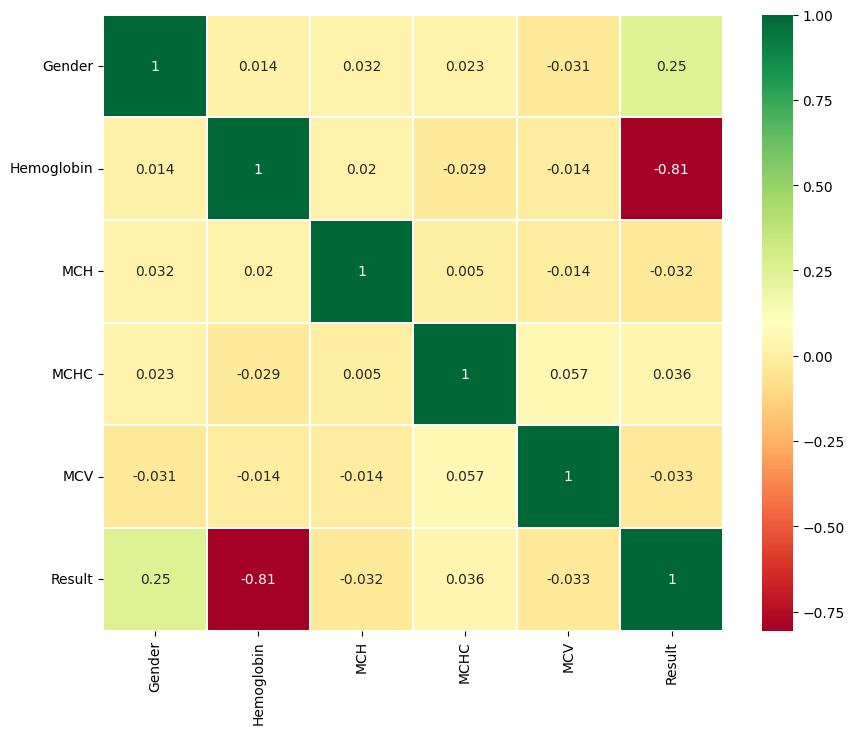

In [28]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [29]:
x=df.drop('Result',axis=1)
x

,Gender,Hemoglobin,MCH,MCHC,MCV
1234,1,16.6,18.8,28.1,70.9
1188,0,15.3,18.3,30.4,93.4
106,0,14.8,20.4,28.5,91.1
954,0,14.6,16.9,31.9,78.1
112,0,15.9,28.7,31.0,81.6
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [30]:
y=df['Result']
y

,Result
1234,0
1188,0
106,0
954,0
112,0
...,...
1415,1
1416,1
1417,1
1418,1


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)
acc_lr=accuracy_score(y_test,y_pred)
c_lr=classification_report(y_test,y_pred)
print('Accuracy Score:',acc_lr)
print(c_lr)

Accuracy Score: 0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.98      1.00      0.99       120

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [35]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
acc_rf=accuracy_score(y_test,y_pred)
c_rf=classification_report(y_test,y_pred)
print('Accuracy Score:',acc_rf)
print(c_rf)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       120

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [36]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(x_train,y_train)
y_pred=decision_tree_model.predict(x_test)
acc_dt=accuracy_score(y_test,y_pred)
c_dt=classification_report(y_test,y_pred)
print('Accuracy Score:',acc_dt)
print(c_dt)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       120

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [37]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train,y_train)
y_pred=NB.predict(x_test)
acc_nb=accuracy_score(y_test,y_pred)
c_nb=classification_report(y_test,y_pred)
print('Accuracy Score:',acc_nb)
print(c_nb)

Accuracy Score: 0.9314516129032258
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       128
           1       0.89      0.98      0.93       120

    accuracy                           0.93       248
   macro avg       0.93      0.93      0.93       248
weighted avg       0.94      0.93      0.93       248



In [39]:
from sklearn.svm import SVC
support_vector=SVC()
support_vector.fit(x_train,y_train)
acc_svc=accuracy_score(y_test,y_pred)
c_svc=classification_report(y_test,y_pred)
print('Accuracy Score:',acc_svc)
print(c_svc)

Accuracy Score: 0.9314516129032258
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       128
           1       0.89      0.98      0.93       120

    accuracy                           0.93       248
   macro avg       0.93      0.93      0.93       248
weighted avg       0.94      0.93      0.93       248



In [40]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred = GBC.predict(x_test)
acc_gbc=accuracy_score(y_test,y_pred)
c_gbc=classification_report(y_test,y_pred)
print('Accuracy Score:',acc_gbc)
print(c_gbc)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       120

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [41]:
prediction=GBC.predict([[0,11.6,22.3,30.9,74.5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [42]:
prediction[0]

np.int64(1)

In [43]:
if prediction[0]==0:
  print("You don't have any anemic Disease")
elif prediction[0]==1:
  print("You have anemic Disease")

You have anemic Disease


In [44]:
model=pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree Classifier','RandomForestClassifier','Gaussian Naive Bayes','support vector Classifier','Gradient Boost Classifier'],
    'score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_svc,acc_gbc],
})


In [45]:
model

,Model,score
0,Logistic Regression,0.991935
1,Decision Tree Classifier,1.000000
2,RandomForestClassifier,1.000000
3,Gaussian Naive Bayes,0.931452
4,support vector Classifier,0.931452
5,Gradient Boost Classifier,1.000000


In [46]:
import pickle
import warnings
pickle.dump(GBC,open("model.pkl","wb"))